In [1]:
using CBFToolbox

In [2]:
n = 4
m = 2
f(x) = [x[3], x[4], 0.0, 0.0]
g(x) = [0.0 0.0; 0.0 0.0; 1.0 0.0; 0.0 1.0]
Σ = ControlAffineSystem(n, m, f, g)

ControlAffineSystem(4, 2, f, g)

In [3]:
P = [2.0 0.0 1.0 0.0; 0.0 2.0 0.0 1.0; 1.0 0.0 1.0 0.0; 0.0 1.0 0.0 1.0]
V(x) = x'P * x
γ(s) = 0.5s
CLF = ControlLyapunovFunction(V, γ)
κCLF = CLFQP(Σ, CLF)

CLFQP(CBFToolbox.var"#control#18"{ControlAffineSystem, ControlLyapunovFunction}(ControlAffineSystem(4, 2, f, g), ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ)))

In [4]:
O = CircularObstacle([-1.0, 1.0], 0.3)
α(s) = s^3
CBF = ControlBarrierFunction(O, α)
HOCBF = HighOrderCBF(CBF, Σ, 2)

HighOrderCBF(CBFToolbox.var"#ψ1#72"{ControlBarrierFunction, ControlAffineSystem}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g)), CBFToolbox.var"#∇ψ1#73"{ControlBarrierFunction, ControlAffineSystem, CBFToolbox.var"#dα#71"{ControlBarrierFunction}, CBFToolbox.var"#dh2dx2#70"{ControlBarrierFunction}, CBFToolbox.var"#dfdx#69"{ControlAffineSystem}}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g), CBFToolbox.var"#dα#71"{ControlBarrierFunction}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0

In [5]:
κ = CBFQP(Σ, HOCBF, κCLF)

CBFQP(CBFToolbox.var"#control#87"{ControlAffineSystem, HighOrderCBF, CLFQP}(ControlAffineSystem(4, 2, f, g), HighOrderCBF(CBFToolbox.var"#ψ1#72"{ControlBarrierFunction, ControlAffineSystem}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g)), CBFToolbox.var"#∇ψ1#73"{ControlBarrierFunction, ControlAffineSystem, CBFToolbox.var"#dα#71"{ControlBarrierFunction}, CBFToolbox.var"#dh2dx2#70"{ControlBarrierFunction}, CBFToolbox.var"#dfdx#69"{ControlAffineSystem}}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g), CBFToolbox.var"#dα#71"{Contro

In [6]:
tf = 20.0
sim = Simulation(tf)

Simulation(0.0, 20.0, 0.01, 0.0:0.01:20.0)

In [9]:
x0 = [-2.2, 2.0, 0.0, 0.0]
T = sim(Σ, κ, x0)

CBFToolbox.Trajectory(0.0:0.01:20.0, [-2.2 -2.1999450002152035 … 0.03220978669829704 0.03234242024497109; 2.0 1.9999500001833623 … -0.03226272456508379 -0.03196959675977981; 0.0 0.010999956959326679 … 0.013375630991781023 0.013151078343024402; 0.0 -0.009999963327503525 … 0.02930549707429331 0.029320063986493033], [1.0999956959326682 1.0779269292271512 … -0.022455264875658472 -0.02241188295275457; -0.9999963327503529 -0.9799338114359271 … 0.0014566912199718595 0.0013052320868791303])

In [10]:
using Plots
using LaTeXStrings
gr()
latexify_plots()

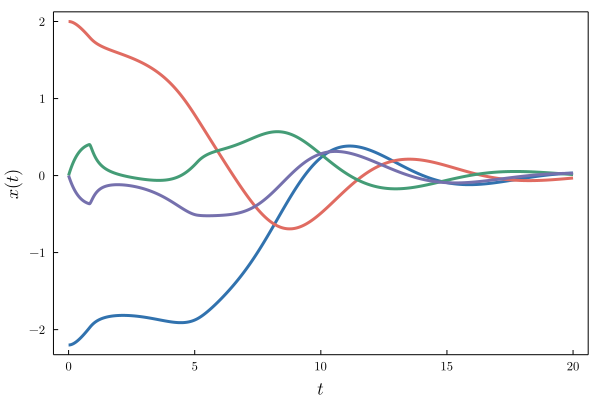

In [11]:
plot(; xlabel=L"t", ylabel=L"x(t)")
plot!(T.t, T.x')

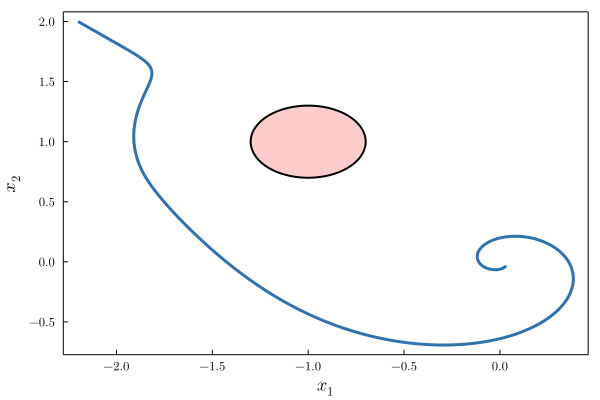

In [12]:
plot(T.x[1, :], T.x[2, :]; xlabel=L"x_1", ylabel=L"x_2")
plot!(
    circle_shape(O);
    seriestype=[:shape],
    fillcolor=:red,
    fillalpha=0.2,
    linecolor=:black,
    lw=2,
    edgecolor=:black,
    label="",
)